### Visualization (시각화)
<img src='./images/visual01.png' width="600" style="margin-left:0">
<img src='./images/visual02.png' width="600" style="margin-left:0">
<img src='./images/visual03.png' width="600" style="margin-left:0">

#### 범주형(상품 카테고리 : 생활용품, 전자제품, 의류, 학생 수준: High,Medium, Low, 측정년도: 2021.2022)
- 바이올린 차트
- 스캐터 플롯
- 막대 차트
- 누적 막대 차트 
#### 수치형(학번 : 1,2,..., 구매횟수: 157,789,..., 가격 : 1280.15648,..., 식물의 높이 : 10.251, ...)
- 막대 차트(숫자가 적을 경우)
- 선 그래프(숫자가 많을 경우)
- 바이올린 차트
- 스캐터 플롯
- 히스토그램
- KDE

In [2]:
import pandas as pd 

t_df = pd.read_csv('./datasets/titanic.csv')
t_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
t_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
t_df.Age = t_df.Age.fillna(t_df.Age.mean())

In [9]:
t_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
t_df[['Pclass']].value_counts()

Pclass
3         491
1         216
2         184
Name: count, dtype: int64

In [14]:
t_df[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.699118,13.002015,0.42,22.0,29.699118,35.0,80.0


In [16]:
t_df.groupby('Pclass')['Age'].max()

Pclass
1    80.0
2    70.0
3    74.0
Name: Age, dtype: float64

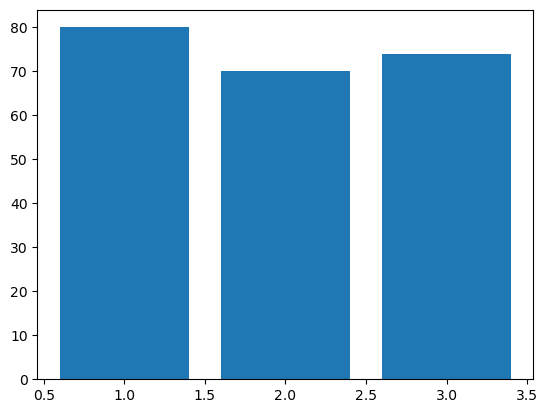

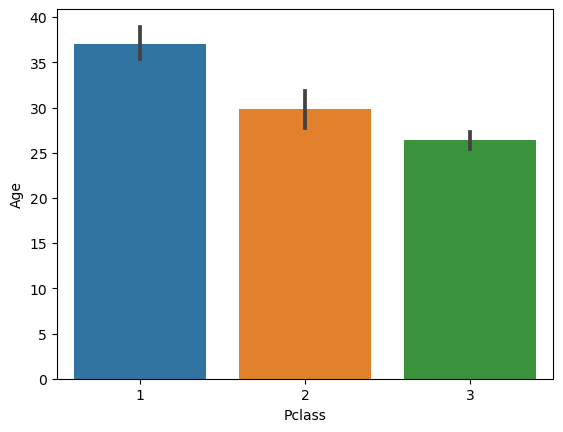

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형은 X축 , 수치형 Y축
# 각 선실 등급 별로 최대 나이를 차트로 나타낸걸 확인 
plt.bar(x=t_df.Pclass, height=t_df.Age) 
plt.show()

sns.barplot(x='Pclass',y='Age',data=t_df)
plt.show()

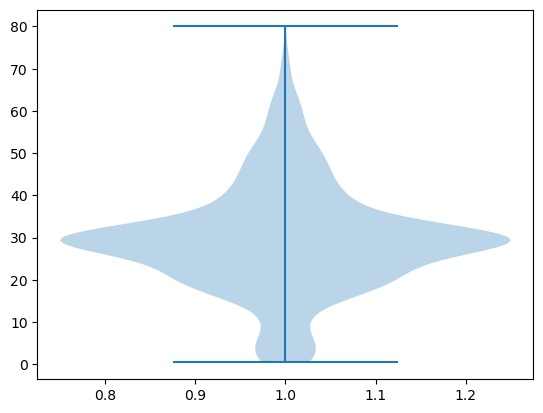

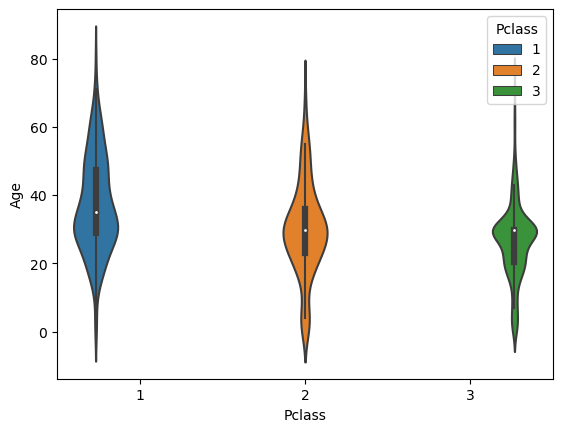

In [26]:
plt.violinplot(t_df.Age)
plt.show()

# hue로 설정할 feature를 x축으로 설정하면 여러 개 군집을 한번에 볼 수 있다.
sns.violinplot(x='Pclass',y='Age', hue='Pclass', data=t_df)
plt.show()

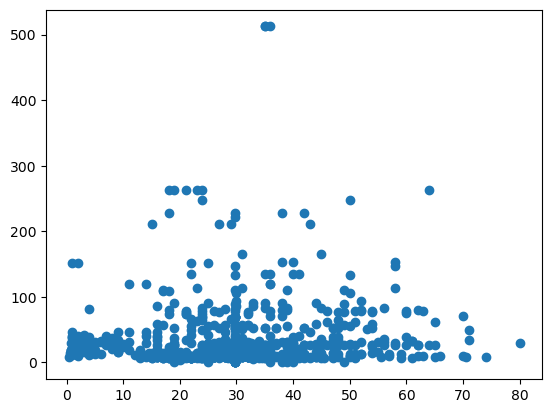

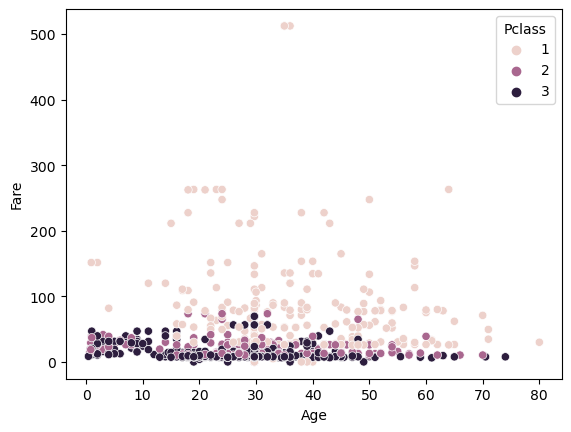

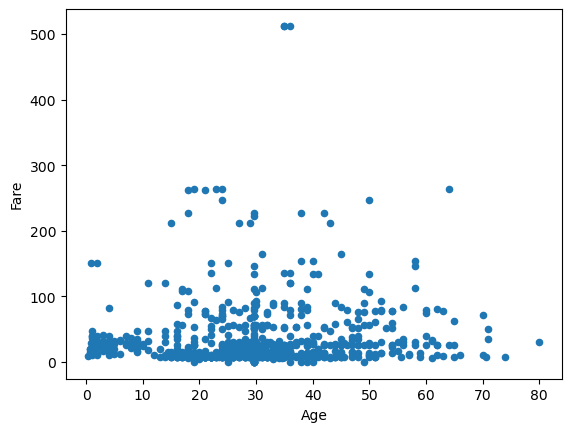

In [33]:
plt.scatter(x=t_df.Age, y=t_df.Fare)
plt.show()
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=t_df)
plt.show()

t_df.plot(x='Age', y='Fare', kind='scatter')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


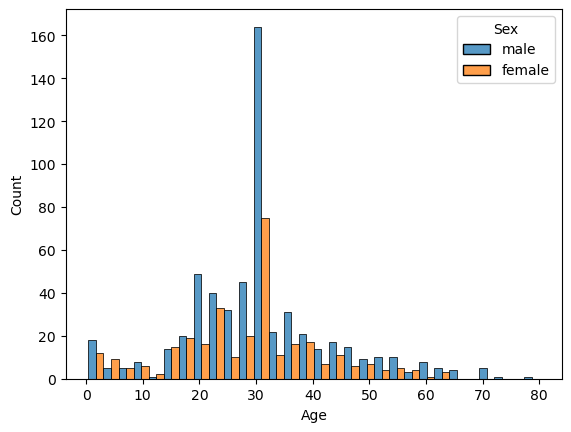

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


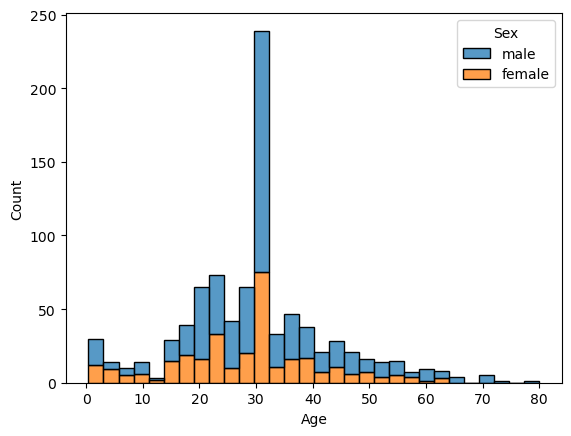

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


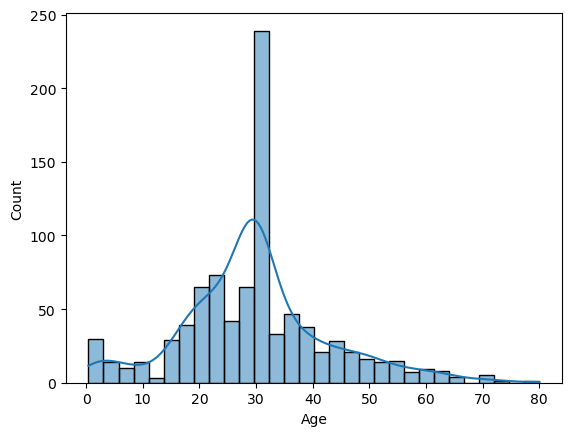

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# y축은 count이다.
sns.histplot(x='Age', data=t_df, hue='Sex', multiple='dodge') # 분포도와 유사 
plt.show()

sns.histplot(x='Age', data=t_df, hue='Sex', multiple='stack')
plt.show()

sns.histplot(x='Age', data=t_df, kde=True)
plt.show()

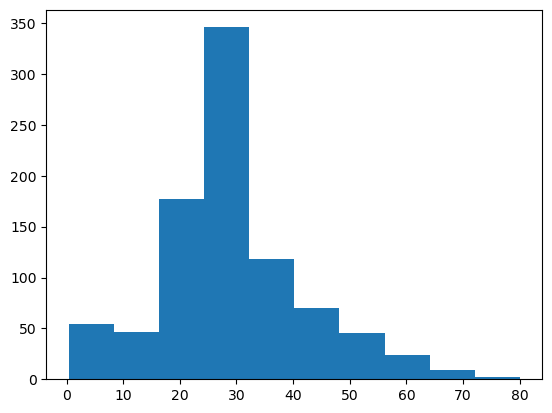

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


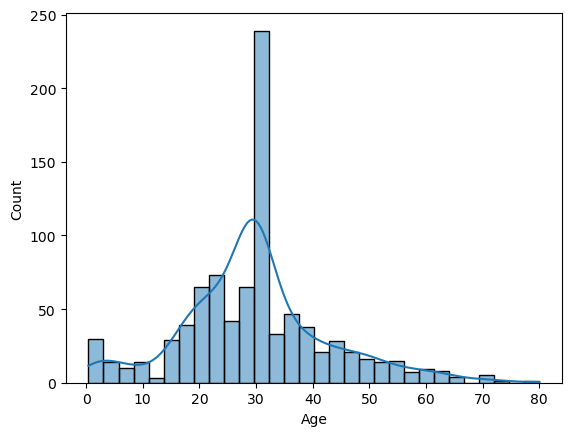

<Axes: >

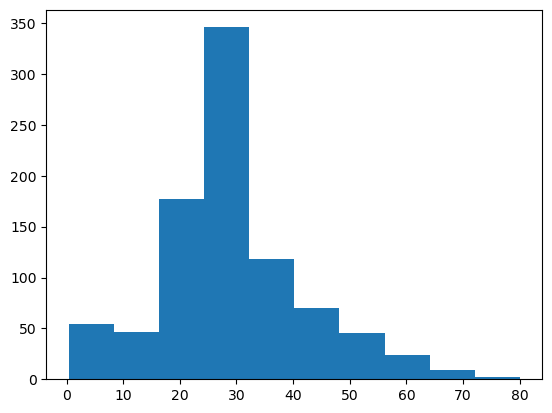

In [48]:
plt.hist(t_df.Age)
plt.show()

sns.histplot(t_df.Age, kde=True)
plt.show()

t_df.Age.hist(grid=False) #격자 없앰 

In [51]:
import pandas as pd
a_df = pd.read_csv('./datasets/avocado.csv')
a_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [52]:
a_df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [58]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.lineplot(x='Date', y='AveragePrice', data=a_df)

In [1]:
a_df.loc[:,'Date'] = pd.to_datetime(a_df.Date)
a_df

NameError: name 'pd' is not defined

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_7564\3256417679.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=90)


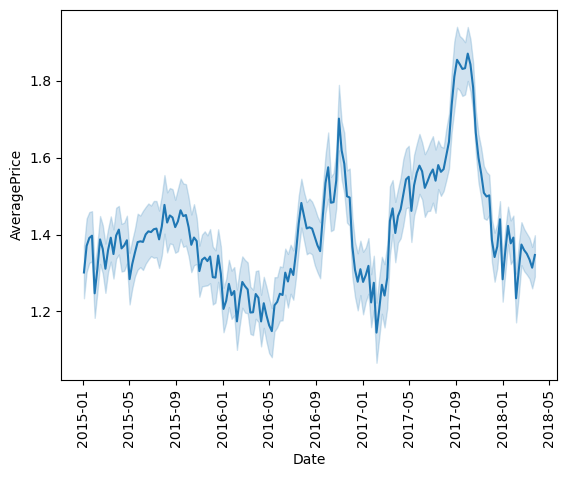

In [57]:
line = sns.lineplot(x='Date', y='AveragePrice', data=a_df)
line.set_xticklabels(line.get_xticklabels(), rotation=90)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_7564\3886319724.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=90)


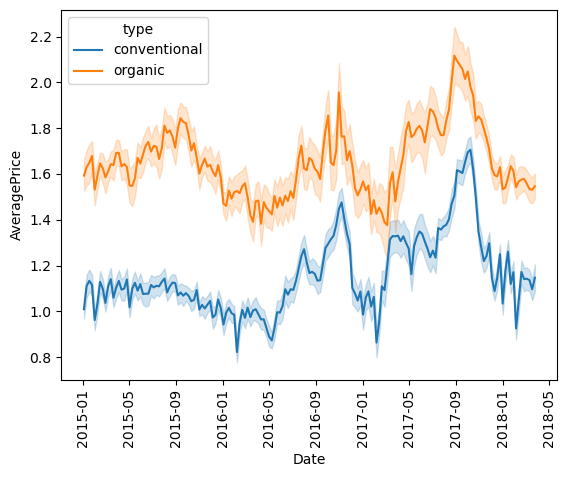

In [59]:
line = sns.lineplot(x='Date', y='AveragePrice',hue='type' , data=a_df)
line.set_xticklabels(line.get_xticklabels(), rotation=90)
plt.show()